# FoML Assignment 1
> Foundations of Machine Learning CS5590  Assignment 1

- toc: true 
- badges: false
- comments: true
- categories: [Quizzes and assignments - Foundations of Machine Learning ]
- author: Abhishek Kumar Dubey

# Questions

## Q. 1.


-  __k-NN: (8 marks)__ In $k$-nearest neighbors $(k-NN)$, the classification is achieved by majority vote in the vicinity of data. Given $n$ points in a 2-dimensional space, consider two settings:
    - __Setting $A$:__ imagine _two_ classes of data each of $n/2$ points, which are overlapped to some extent in the space.
    - __Setting $B$:__ imagine _three_ classes of data each of $n/3$ points, which are overlapped to some extent in the space.<br>Now, answer the following questions:
        - $(a)$ __(2 marks)__ Describe what happens to the training error (using all available data) when the neighbor size $k$ varies from $n$ to $1$ in Setting $A$. How does this behavior change in Setting $B$?
        - $(b)$ __(3 marks)__ Predict and explain with a sketch how the generalization error (e.g. holding out some data for testing) would change when $k$ varies in both settings? Explain your reasoning.
        - $(c)$ __(3 marks)__ Is it possible to build a univariate decision tree $($ with decisions at each node of the form “is $x > a$”, “is $x < b$”, “is $y > c$”, or “is $y < d$” for any real constants $a, b, c, d$ $)$ which classifies exactly similar to a $1-NN$ using the Manhattan (city block) distance? If so, give an example of a dataset setup where this can happen. If not, explain why not.

### Answer

- Answer :
    - $(a)$ 
        - Setting A: When value of $k$ is $n$ it would  include all the points the so a new data point would always be classified as a class which has more data point in the training set. As the value of $k$ starts to decrease the classification starts to get better, it achieves a maximum value and then it starts to decrease.   
        - Setting B: This Setting differs slightly from setting A as the 
    - $(b)$ Generalization error would attain minima when 

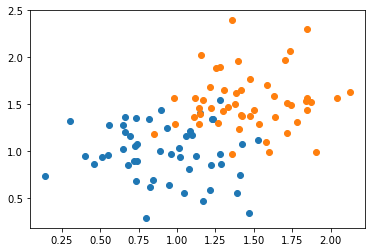

In [18]:
import matplotlib.pyplot as plt
import numpy as np
numData = 100
meanA = [1,1]
covA = [[0.1,0.01],
        [0.01,0.1]]
meanB = [1.5,1.5]
covB = [[0.1,0.01],
        [0.01,0.1]]
dataA = np.random.multivariate_normal(meanA,covA,numData//2)
targetA = np.zeros(numData//2)
dataB = np.random.multivariate_normal(meanB,covB,numData//2)
targetB = np.ones(numData//2)
data = np.vstack([dataA,dataB])
target = np.hstack([targetA,targetB])

plt.scatter(dataA[:,0],dataA[:,1])
plt.scatter(dataB[:,0],dataB[:,1]);

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=0)

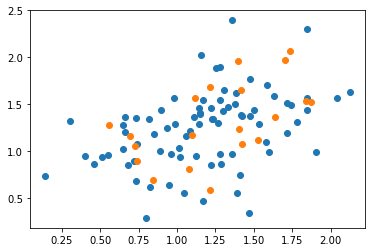

In [20]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_test[:,0],X_test[:,1]);

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,X_train.shape[0])
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_train)
        scores[k] = metrics.accuracy_score(y_train,y_pred)
        scores_list.append(metrics.accuracy_score(y_train,y_pred))

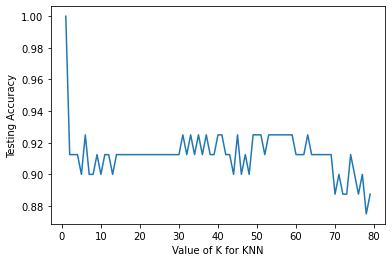

In [22]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy');

## Q. 2.


- Bayes Classifier: (6 marks)
    - $(a)$ __(3 marks)__ Consider a classification problem with $K$ classes for which the feature vector $\phi$ has $M$ dimensions (categorical variables) each of which can take $L$ discrete states. Let the values of the dimensions be represented by a one-hot ($1$-of-$L$) binary coding scheme. Further suppose that, conditioned on the class $C_k$, the $M$ dimensions of $\phi$ are independent, so that the class-conditional density factorizes with respect to the feature vector components (also referred to as the naive Bayes assumption). Show that the quantities given below:<br>$$a_k=\ln p(\phi|C_k)p(C_k)$$ are linear function of the components  of $\phi$.
    - $(b)$ __(3 marks)__ You are now going to make a text classifier. To begin with, you attempt to classify documents as either _sport_ or _politics_. You decide to represent each document as a (row) vector of attributes describing the presence or absence of the following words.<br>  $X$ __= (goal,football,golf,defence,offence,wicket,office,strategy)__ <br> Training data from sport documents and from politics documents is represented below in a matrix in which each row represents the 8 attributes. $$\\
x_{politics}=\left\lbrack \begin{array}{cccccccc}
1 & 0 & 1 & 1 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & 1 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 1 & 1 & 0 & 1\\
0 & 0 & 0 & 1 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 1 & 0 & 0 & 1
\end{array}\right\rbrack$$ $$\\
x_{sport} = \left\lbrack \begin{array}{cccccccc}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & 0 & 0
\end{array}\right\rbrack$$ <br> Using a maximum likelihood naive Bayes classifier, what is the probability that the document $x = (1, 0, 0, 1, 1, 1, 1, 0)$ is about politics?

### Answer

- $(a)$ A function is said to be liner if it satisfies below two properties:
    - Distributive over addition: $f(x+a)=f(x)+f(a)$
    - Homogenous of Degree one: $f(ax)=af(x)$
    
    The give equation is : $a_k=\ln p(\phi|C_k)p(C_k)$
    - $\ln p(\phi+a|C_k)p(C_k) \\=\ln\left( p(\phi|C_k)+p(a|C_k)-p((a\cap\phi)|C_k) \right)p(C_k) \\= \ln\left( p(\phi|C_k)+p(a|C_k) \right)p(C_k)$,<br> as $\phi$ is independent of $a$ $p((a\cap\phi)|C_k)$ 
    - $a_k=\ln p(a\phi|C_k)p(C_k)=a\ln p(\phi|C_k)p(C_k)$
    

## Q. 3.



-   Model Selection: (__6 marks)__ Install the `pydataset` module (if you haven’t already):<br>
    
    ```
    from pydataset import data
    import pandas as pd
    melanoma_data = data ( 'Melanoma' , show_doc=True )
    ```
    The _Melanoma_ dataset consists of measurements of patients with malignant melanoma (a type of cancer). For each patient, the dataset specifies if the patient died or lived at the end of the trial. Moreover, some patients died due to causes unrelated to melanoma. Your task is to do the following: 
    - $(a)$ __(1 mark)__ Remove those patients who died due to causes unrelated to Melanoma, and plot patient status vs age and patient status vs thickness - for your own understanding. 
    - $(b)$ __(4 marks)__ Split the data into 80% training and 20% test set using random stratified sampling. Now, on the 80% training data, perform 3-fold cross-validation using a classifier to predict the status of the patient (do not use the 20% held-aside test data for cross-validation; we will use it later to study generalization performance). Also, remember to use stratified sampling inside cross-validation too. You are allowed to use any existing machine learning library of your choice: scikitlearn, pandas, Weka (we recommend scikitlearn) - but you should use only the decision tree, k-NN or the naive Bayes classifier (to align with what we have covered in class so far, random forests not allowed too). Report the mean of the three quantities (accuracy, precision, recall) on 3-fold cross-validation. 
    - $(c)$ __(1 mark)__ Once you have picked the best classification model in cross-validation, train the best-performing setting on the entire 80% training data, and report performance on the held-aside test set. Report your observation on how representative the training/ validation data was w.r.t test data. 
    - Deliverables:
        - Code 
        - Data splits (for us to verify your reported results)
        - Brief report (PDF) with your solutions for the above questions

## Q. 4.



-  Decision Trees: __(10 marks)__ In this question, you will use the Car Evaluation dataset, a popular dataset from the UCI Machine Learning Repository. It contains 1728 car sample information with 7 attributes, including one class feature that tells whether the car is in acceptable conditions (class labels: Unacceptable, Acceptable, VeryGood, Good). More details of the dataset description are available on https://archive.ics.uci.edu/ml/datasets/ car+evaluation. You must not use the last column as an input feature when you classify the data. You can pre-process the variables into one-hot/ordinal values as you deem fit for each variable.
    - $(a)$ (5 marks) Decision Tree Implementation: Implement your own version of the decision tree using binary univariate split, entropy and information gain.
    - $(b)$ (2 marks) Cross-Validation: Evaluate your decision tree using 5-fold cross validation. (Divide the entire dataset into 5 parts using stratified sampling, and run this experiment; no test set is required for this question.) Report the average of the 5 folds’ accuracies. With correct implementation of both parts (decision tree and cross validation), your classification accuracy should be around 0.8.
    - $(c)$ (3 marks) Improvement Strategies: Now, try and improve your decision tree algorithm. Some things you could do include (not exhaustive):
        - Use Gini index instead of entropy
        - Use multi-way split (instead of binary split)
        - Use multivariate split (instead of univariate)
        - Prune the tree after splitting for better generalization
        Report your performance as an outcome of ANY TWO improved strategies.
    Deliverables:
    - Code
    - Brief report (PDF) with: (i) Accuracy of your initial implementation; (ii) Accuracy of your improved implementation, along with your explanation of why the accuracy improved with this change.